In [1]:
import numpy as np 
import matplotlib
from matplotlib import pyplot as plt

def MHK2(x, y, s_y=None, s_x=None, label=None, scattercolor=None, linecolor=None, showline=None, xlabel=None, ylabel=None, title=None):
    array_x = np.array(x)
    x_ = array_x.mean()

    array_y = np.array(y)
    y_ = array_y.mean()

    array_xy = np.array(x * y)
    xy_ = array_xy.mean()

    array_x2 = np.array(x * x)
    x2_ = array_x2.mean()

    array_y2 = np.array(y * y)
    y2_ = array_y2.mean()

    k = (xy_ - x_ * y_) / (x2_ - x_ ** 2)

    b = y_ - k * x_

    Dyy = y2_ - y_ ** 2
    Dxx = x2_ - x_ ** 2

    sigma_k = ((Dyy / Dxx - k  ** 2) / (len(x) - 2)) ** 0.5

    sigma_b = sigma_k * ((x2_) ** 0.5)

    plt.grid(True)
    plt.minorticks_on()
    plt.grid(which = 'minor', alpha = 0.2)
    
    plt.errorbar(x, y, xerr=s_x, yerr=s_y, linestyle="None", color=scattercolor)
    plt.scatter(x, y, s=6, color = scattercolor, label=label)
    
    if showline == True: 
        x0 = np.array([min(x), max(x)])
        y0 = k * x0 + b
        plt.plot(x0,y0, 'k--', color=linecolor)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    print("k: ", k, "sigma_k: ", sigma_k, "b: ", b, "sigma_b: ", sigma_b)
    return(k, sigma_k, b, sigma_b)

k:  1.849831127819549 sigma_k:  0.03485909349274242 b:  4135.671428571426 sigma_b:  1936.9551833565095
k:  103.1178084210526 sigma_k:  1.8847501060275524 b:  172438.00000000186 sigma_b:  104726.66158005115


/var/folders/qq/pjggzry53mq7xbvhcjr59g800000gp/T/ipykernel_32482/1325610137.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x0,y0, 'k--', color=linecolor)


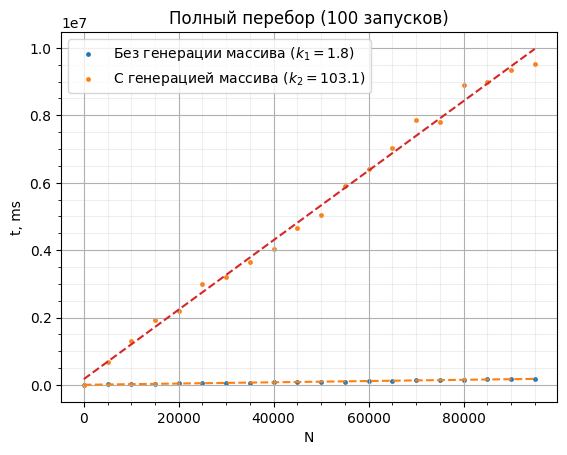

In [7]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

f1 = open('linear_search.txt', 'r')
lines1 = f1.readlines()
t1 = np.array(list(map(int, lines1[0].split())))
N1 = np.array(list(map(int, lines1[1].split())))

f2 = open('linear_search_with_generation.txt', 'r')
lines2 = f2.readlines()
t2 = np.array(list(map(int, lines2[0].split())))
N2 = np.array(list(map(int, lines2[1].split())))

MHK2(N1, t1, showline = True, label=r"Без генерации массива ($k_1 = 1.8$)")
MHK2(N2, t2, showline = True, label=r"С генерацией массива ($k_2 = 103.1$)")
plt.grid(True)
plt.minorticks_on()
plt.grid(which = 'minor', alpha = 0.2)
plt.title("Полный перебор (100 запусков)")
plt.xlabel("N")
plt.ylabel("t, ms")
plt.legend()

k:  6.766917293233083e-06 sigma_k:  0.0004843377817078243 b:  236.42857142857142 sigma_b:  26.912362966916582
k:  107.75919323308271 sigma_k:  1.4714827356286164 b:  -4407.428571429104 sigma_b:  81763.34569884524


/var/folders/qq/pjggzry53mq7xbvhcjr59g800000gp/T/ipykernel_32482/1325610137.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x0,y0, 'k--', color=linecolor)


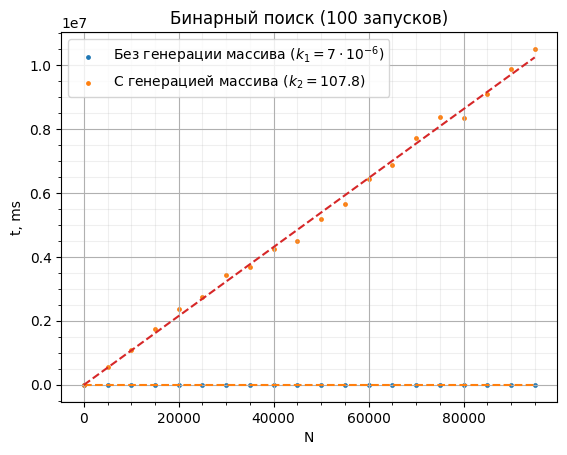

In [9]:
f3 = open('binsearch.txt', 'r')
lines3 = f3.readlines()
t3 = np.array(list(map(int, lines3[0].split())))
N3 = np.array(list(map(int, lines3[1].split())))

f4 = open('binsearch_with_generation.txt', 'r')
lines4 = f4.readlines()
t4 = np.array(list(map(int, lines4[0].split())))
N4 = np.array(list(map(int, lines4[1].split())))

MHK2(N3, t3, showline = True, label=r"Без генерации массива ($k_1 = 7 \cdot 10^{-6}$)")
MHK2(N4, t4, showline = True, label=r"С генерацией массива ($k_2 = 107.8$)")
plt.grid(True)
plt.minorticks_on()
plt.grid(which = 'minor', alpha = 0.2)
plt.title("Бинарный поиск (100 запусков)")
plt.xlabel("N")
plt.ylabel("t, ms")
plt.legend()